# WIWINO market analysis - Insights about wines and how much money they can bring us...

<img src="/home/siegfried2021/Bureau/BeCode_AI/Projets/Wiwino_project/visualizations/wiwino_title.webp" alt="Wine Production Analysis" width="1000"/>


## Question 1: Select 10 wines to push in order to increase sales

In [1]:
import numpy as np
import pandas as pd

selection_sales_df = pd.read_csv('/home/siegfried2021/Bureau/BeCode_AI/Projets/Wiwino_project/CSV files/question1.csv')

# Calculation of the Popularity Score per wine
selection_sales_df['popularity_score'] = selection_sales_df['vintage_ratings_average'] * np.log(selection_sales_df['vintage_rating_count'])

# Calculation of the Value for Money
selection_sales_df['value_for_money'] = selection_sales_df['vintage_ratings_average'] / selection_sales_df['liter_price_euros'] * 500

# Establishing a ranking by Popularity Score
selection_sales_df['popularity_rank'] = selection_sales_df['popularity_score'].rank(ascending=False, method='min')

# Establishing a ranking by Value for Money
selection_sales_df['value_rank'] = selection_sales_df['value_for_money'].rank(ascending=False, method='min')

# Average rank of Popularity Score and Value for Money
selection_sales_df['combined_rank'] = (selection_sales_df['popularity_rank'] + selection_sales_df['value_rank']) / 2

# Dropping the duplicated based on wine_name
selection_no_duplicated_wine = selection_sales_df.sort_values('combined_rank').drop_duplicates(subset='wine_name')

# Sorting by combined rank within each country and selecting the top three wines from each country
top_wines_by_country = selection_no_duplicated_wine.sort_values('combined_rank').groupby('country').head(3).reset_index(drop=True)

# Sorting the selected wines by the combined rank and picking the top 10
top_10_sales = top_wines_by_country.sort_values('combined_rank').head(10)

# Displaying the selected wines
top_10_sales = top_10_sales[['vintage_name', 'country', 'popularity_score', 'value_for_money', 'combined_rank', 'popularity_rank', 'value_rank', 'vintage_ratings_average', 'vintage_rating_count', 'liter_price_euros']]
top_10_sales.to_csv('/home/siegfried2021/Bureau/BeCode_AI/Projets/Wiwino_project/CSV files/top10.csv')

/home/siegfried2021/anaconda3/envs/myenv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


### Question 1: Interactive bar chart

In [2]:
import plotly.express as px

# Ensuring the DataFrame is sorted by 'combined_rank' before melting
top_10_sales_sorted = top_10_sales.sort_values(by='combined_rank', ascending=True)

# Creating a new column combining wine name and country
top_10_sales_sorted["name_and_country"] = top_10_sales_sorted.apply(lambda row: f"{row['vintage_name']} - {row['country'].upper()}", axis=1)

# Melting the DataFrame for easier plotting
top_10_melted = top_10_sales_sorted.melt(id_vars=['name_and_country', 'vintage_ratings_average', 'vintage_rating_count', 'liter_price_euros'], value_vars=['combined_rank', 'popularity_rank', 'value_rank'], var_name='ranking type', value_name='rank_value')

# Creating a bar plot with interactive information display
fig = px.bar(top_10_melted, 
             x='name_and_country', 
             y='rank_value', 
             color='ranking type', 
             hover_data=['vintage_ratings_average', 'vintage_rating_count', 'liter_price_euros'], 
             title='Top 10 Wines: Ranks by Type and Country',
             height=1000,
             color_discrete_sequence=px.colors.sequential.Cividis)

# Customizing the layout
fig.update_layout(
    title={'text': 'Ranking of the top 10 Wines to boost sales', 'font': {'size': 28}}, 
    xaxis_title={'text': 'Vintage Wine Name', 'font': {'size': 20, 'family': 'Arial', 'color': 'black'}},  
    yaxis_title={'text': 'Ranking', 'font': {'size': 20, 'family': 'Arial', 'color': 'black'}},  
    xaxis_tickangle=-45,
    barmode='group')

fig.show()

## Question 2: Selecting a country for marketing activities

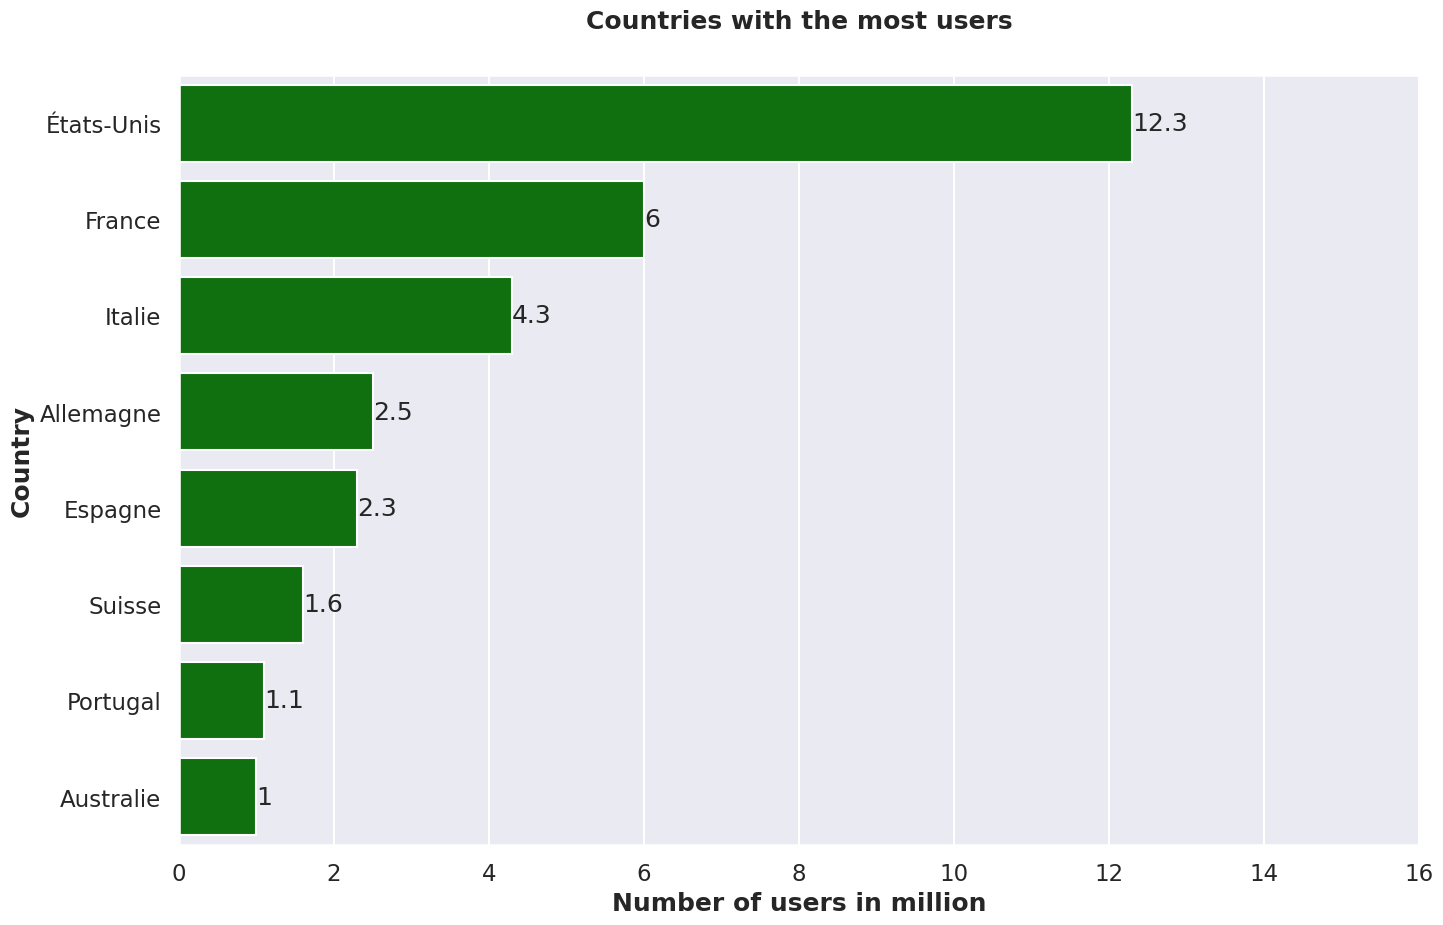

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

users = pd.read_csv("/home/siegfried2021/Bureau/BeCode_AI/Projets/Wiwino_project/CSV files/question2.csv")

# Create a new column to store the number of users in million
users["users_count_million"] = np.round(users["users_count"]/1000000, 1)

# Keep only countries with at least one milion users
users = users[users["users_count"] >= 1000000]

plt.figure(figsize=(16, 10))

sns.set_theme(style="darkgrid", context="talk")
sns.color_palette("Paired")

ax = sns.barplot(data=users, x="users_count_million", y="name", orient="y", estimator="sum", errorbar=None, color="green")
ax.bar_label(ax.containers[0])
ax.set(xlim=(0, 16))

ax.set_xlabel("Number of users in million", fontfamily='sans-serif', fontstyle='normal', fontweight='bold')
ax.set_ylabel("Country", fontfamily='sans-serif', fontstyle='normal', fontweight='bold')
ax.set_title("Countries with the most users", y=1.05, fontweight='bold')

plt.show()

## Question 3: Awards for the 3 best wineries

In [4]:
import plotly.graph_objs as go

df_question3 = pd.read_csv('/home/siegfried2021/Bureau/BeCode_AI/Projets/Wiwino_project/CSV files/question3_shortlist.csv')

def adjust_size(size_series, min_size, max_size):
    min_val = size_series.min()
    max_val = size_series.max()
    return min_size + (size_series - min_val) / (max_val - min_val) * (max_size - min_size)

df_question3['adjusted_size'] = adjust_size(df_question3['avg_ratings_average'], 70, 100)

fig = px.scatter(
    df_question3,
    x='name',  
    y='avg_ratings_average',  
    size='adjusted_size',  
    color='total_ratings_count',  
    hover_name='name',  
    hover_data={'name': True, 'total_ratings_count': True, 'avg_ratings_average': True},
    title='Best rated Wineries',
    labels={'total_ratings_count': 'Rating Counts', 'avg_ratings_average': 'Average Rating', 'name': 'Winery'},
    color_continuous_scale='Viridis'
)

tickvals = df_question3['name'].tolist()
ticktext = [f"<span style='font-weight: 1000;'>{name}</span>" if i < 3 else name for i, name in enumerate(tickvals)]

fig.update_layout(
    xaxis_title='Winery',
    yaxis_title='Rating Average',
    xaxis_tickangle=-45,
    showlegend=True,
    height=800,
    title={'font': {'size': 24 }},
    xaxis={'title': {'font': {'size': 20}}, 'tickfont': {'size': 15}, 'tickvals': tickvals,'ticktext': ticktext},
    yaxis={'title': {'font': {'size': 20}}},
)

## Question 4: A unique taste combination

In [5]:
df_question4 = pd.read_csv('/home/siegfried2021/Bureau/BeCode_AI/Projets/Wiwino_project/CSV files/question4.csv')

# Styling the df output
styled_df_question_4 = df_question4.style.set_table_styles({
    '': [{'selector': 'tr:hover', 'props': 'background-color: lightgrey;'}],
    '': [{'selector': 'td', 'props': 'color: black;'}],
    '': [{'selector': 'td', 'props': 'border-color: black;'}],
}).set_properties(**{
    'font-size': '14pt',
    'border': '1px solid black'
}).set_table_attributes('style="width: 60%; height: 70%;"')

styled_df_question_4

,wine_name,group_name
Belle Epoque Brut Champagne,Subtly aphrodisiac flavour,France
Blanc des Millénaires,Subtly aphrodisiac flavour,France
Brut Champagne,Subtly aphrodisiac flavour,France
Comtes de Champagne Blanc de Blancs,Subtly aphrodisiac flavour,France
Cristal Brut Champagne (Millésimé),Subtly aphrodisiac flavour,France
Cuvée des Enchanteleurs Brut Champagne,Subtly aphrodisiac flavour,France
Dom Ruinart Blanc de Blancs Brut Champagne,Subtly aphrodisiac flavour,France
Grande Cuvée,Subtly aphrodisiac flavour,France
La Grande Année Brut Champagne,Subtly aphrodisiac flavour,France
La Grande Dame Brut Champagne,Subtly aphrodisiac flavour,France


## Question 5: Most used grapes over the world and a selection of the best wines for each of these grapes

### Question 5: Identifying the most used grapes across countries

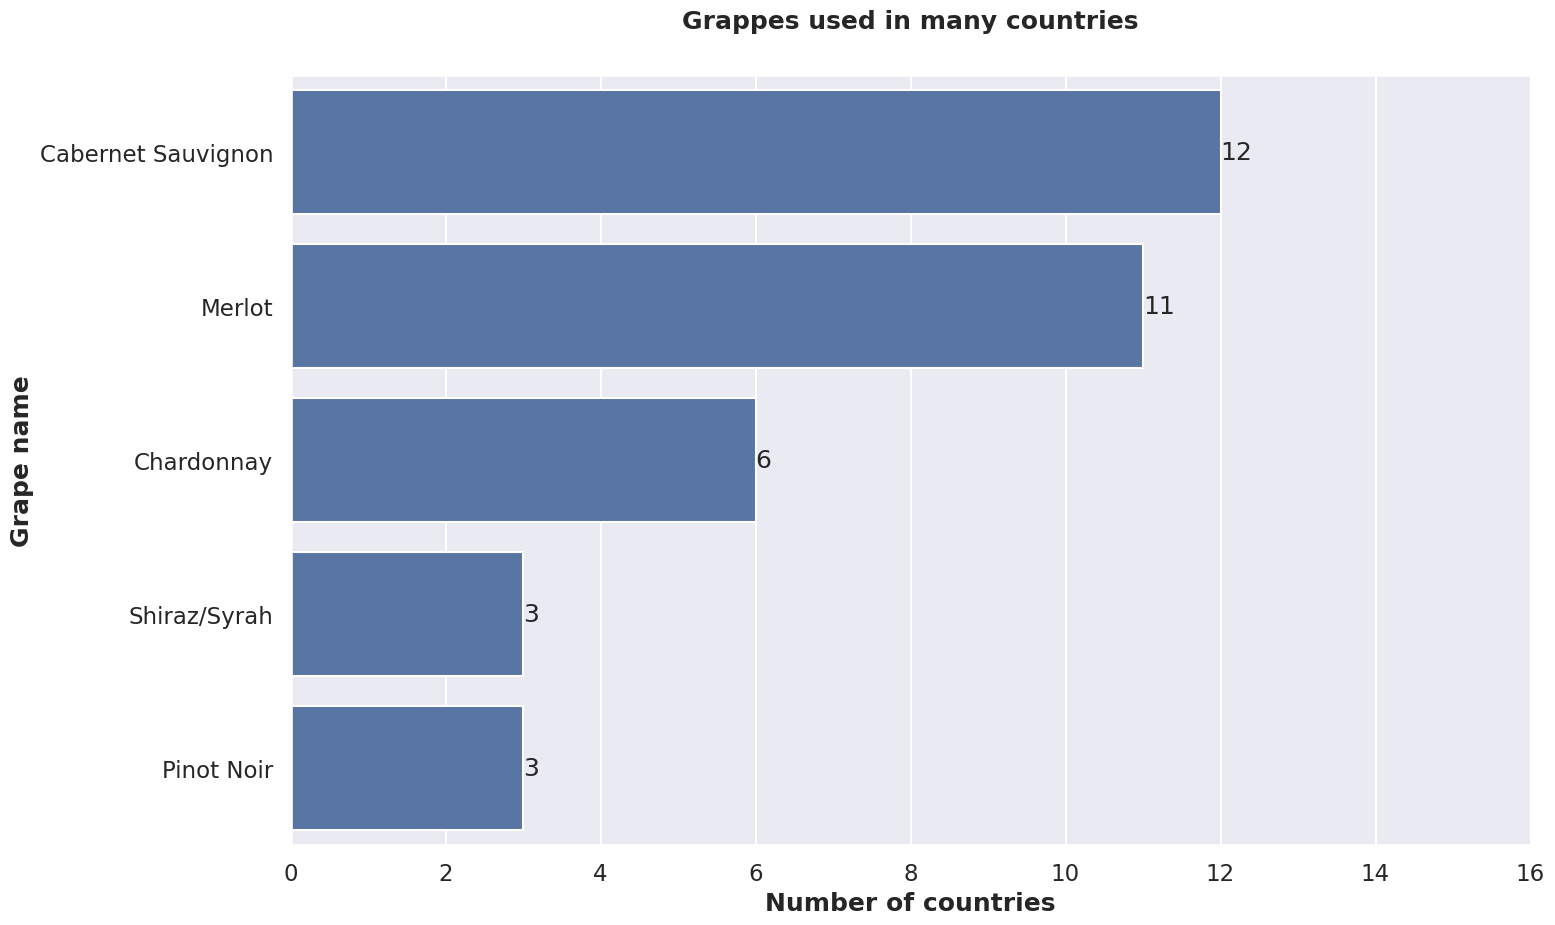

In [6]:
grapes = pd.read_csv("/home/siegfried2021/Bureau/BeCode_AI/Projets/Wiwino_project/CSV files/top_grapes.csv")

# Keep only the grapes used in more tha one country
grapes = grapes[grapes["countries_count"] > 1]

plt.figure(figsize=(16, 10))

sns.set_theme(style="darkgrid", context="talk")
sns.color_palette("Paired")

ax = sns.barplot(data=grapes, x="countries_count", y="grape_name", orient="y", estimator="sum", errorbar=None)
ax.bar_label(ax.containers[0])
ax.set(xlim=(0, 16))

ax.set_xlabel("Number of countries", fontfamily='sans-serif', fontstyle='normal', fontweight='bold')
ax.set_ylabel("Grape name", fontfamily='sans-serif', fontstyle='normal', fontweight='bold')
ax.set_title("Grappes used in many countries", y=1.05, fontweight='bold')

plt.show()

### Question 5: Top 5 wines for the 3 most used grapes

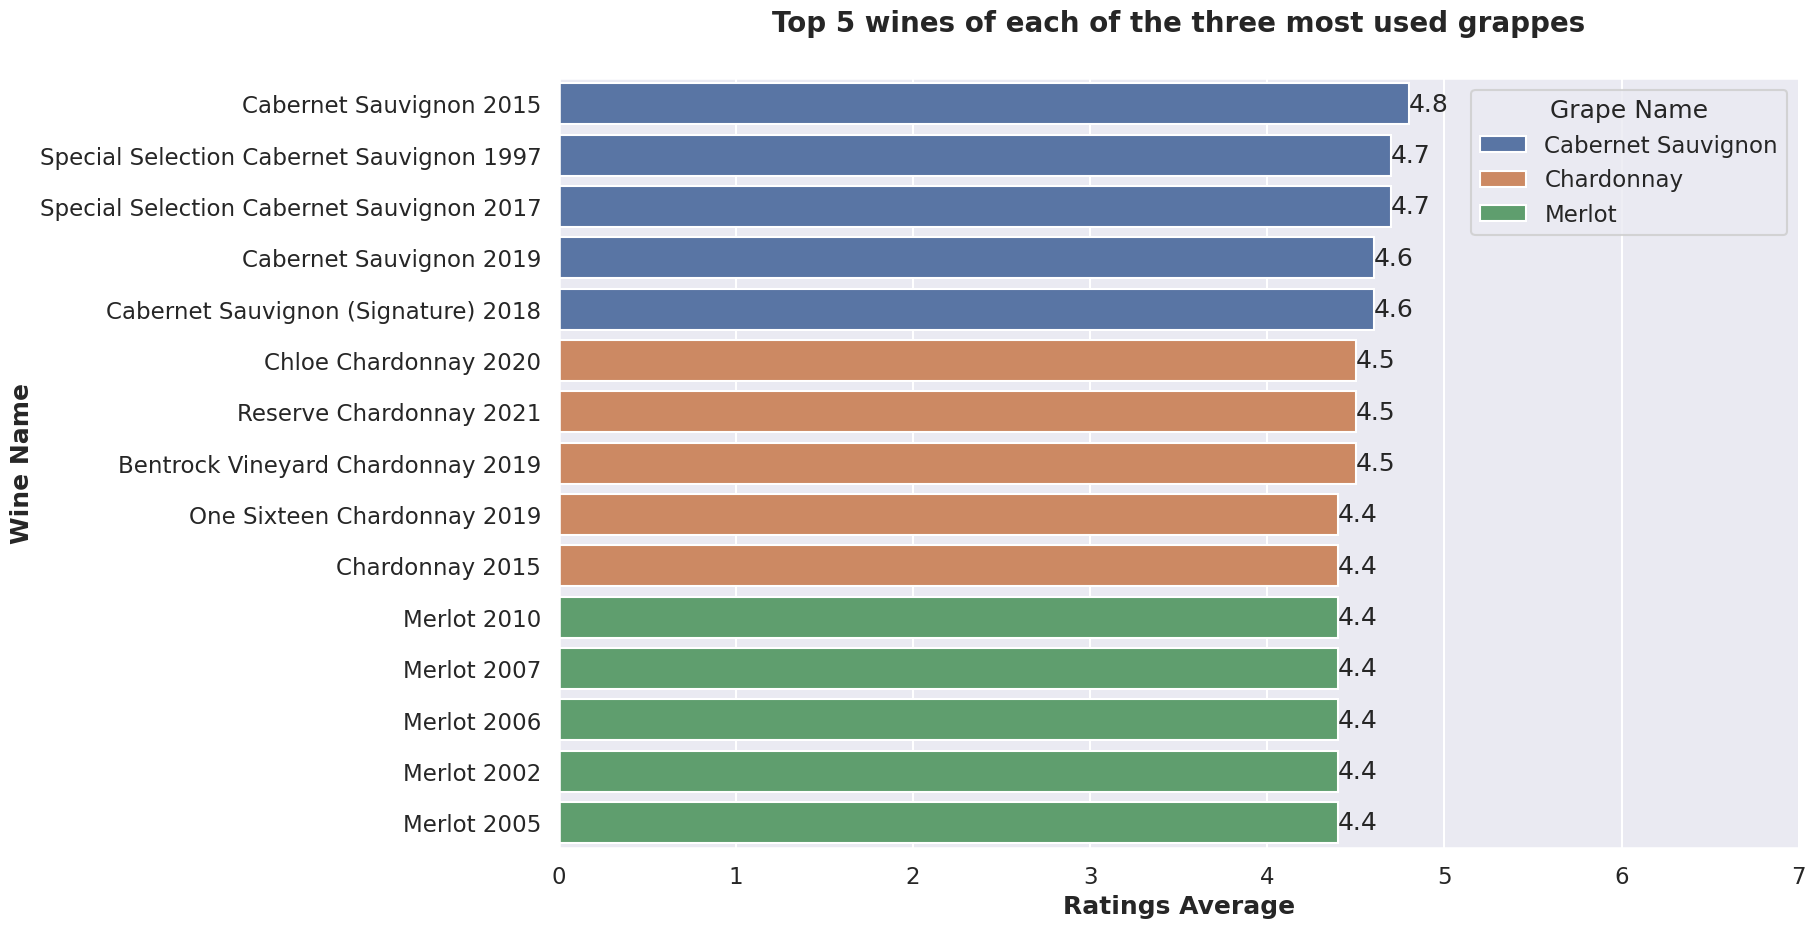

In [7]:
wines = pd.read_csv("/home/siegfried2021/Bureau/BeCode_AI/Projets/Wiwino_project/CSV files/question5.csv")

# Add the year to the wine name to distinguish wines with the same name but from different vintages
wines["wine_name"] = wines["wine_name"].astype(str) + " " + wines["year"].astype(str)

# Get the top five wines of each grape

top5_cabernet = wines[wines["grape_name"] == "Cabernet Sauvignon"].sort_values(
                                by=["ratings_average", "ratings_count"], ascending=[False, False]).head(5)

top5_chardonnay = wines[wines["grape_name"] == "Chardonnay"].sort_values(
                                by=["ratings_average", "ratings_count"], ascending=[False, False]).head(5)

top5_merlot = wines[wines["grape_name"] == "Merlot"].sort_values(
                                by=["ratings_average", "ratings_count"], ascending=[False, False]).head(5)

# Concatenate these three DataFrames into one
top5_wines = pd.concat([top5_cabernet, top5_chardonnay, top5_merlot], ignore_index=True)

plt.figure(figsize=(16, 10))

sns.set_theme(style="darkgrid", context="talk")
sns.color_palette("Paired")

ax = sns.barplot(data=top5_wines, x="ratings_average", y="wine_name", orient="y",
                 hue="grape_name", errorbar=None, legend="brief")

ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2])
ax.set(xlim=(0, 7))

ax.legend(title='Grape Name')
ax.set_xlabel("Ratings Average", fontfamily='sans-serif', fontstyle='normal', fontweight='bold')
ax.set_ylabel("Wine Name", fontfamily='sans-serif', fontstyle='normal', fontweight='bold')
ax.set_title("Top 5 wines of each of the three most used grappes",
             y=1.05, fontweight='bold', fontsize=20)

plt.show()


## Question 6: Country leaderboard

### Question 6: Bubble chart for countries information (wine count, average rating, median price)

In [14]:
selection_sales_df = selection_sales_df[selection_sales_df['country'] != 'Israël']

# Aggregating data per country
vint_agg_data = selection_sales_df.groupby('country').agg(
    median_price=('liter_price_euros', 'median'),
    weighted_avg_rating=('vintage_ratings_average', lambda x: (x * selection_sales_df.loc[x.index, 'vintage_rating_count']).sum() / selection_sales_df.loc[x.index, 'vintage_rating_count'].sum()),
    vintage_count=('vintage_name', 'count')
).reset_index()

# Bubble chart parameters
fig = px.scatter(
    vint_agg_data,
    x='median_price',
    y='weighted_avg_rating',
    size='vintage_count',
    color='country',
    hover_name='country',
    size_max=180,
    height=700
)

# Adjusting the titles and font sizes
fig.update_layout(
    title={
        'text': 'Bubble Chart: Wine Prices (Vintages), Ratings, and Countries',
        'font': {'size': 24}, 
        'x': 0.5,
        'xanchor': 'center'
    },
    xaxis_title={
        'text': 'Median Price (Euros)',
        'font': {'size': 18} 
    },
    yaxis_title={
        'text': 'Weighted Average Rating (scale from 0 to 5)',
        'font': {'size': 18} 
    }
)

fig.show()


### Question 6: Average ratings per country for both wines and vintages tables

In [24]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Creating 2 sorted dataframes for wines and vintages (sorted by weighted average ratings in descending order)
vintages_ratings_country = pd.read_csv('/home/siegfried2021/Bureau/BeCode_AI/Projets/Wiwino_project/CSV files/question6(vintage).csv')
wines_ratings_country = pd.read_csv('/home/siegfried2021/Bureau/BeCode_AI/Projets/Wiwino_project/CSV files/question6(wines).csv')
sorted_vintages = vintages_ratings_country.sort_values(by='weighted_average_rating', ascending=False)
sorted_wines = wines_ratings_country.sort_values(by='weighted_average_rating', ascending=False)

# Creating the subplots (average ratings for wines and average ratings for vintages) with 2 rows
fig = make_subplots(
    rows=2, cols=1, 
    subplot_titles=('Weighted Average Ratings for Wines by Country', 'Weighted Average Ratings for Vintages by Country')
)
color_vintages = '#6b9ac4'
color_wines = '#003f6c'

# Plot wines ratings
fig.add_trace(
    go.Bar(
        x=sorted_wines['country_name'],
        y=sorted_wines['weighted_average_rating'],
        name='Wines Ratings',
        marker_color=color_wines,
        text=sorted_wines['weighted_average_rating'].round(2),
        textposition='outside',
        texttemplate='%{text:.2f}'
    ),
    row=1, col=1
)

# Plotting vintages ratings
fig.add_trace(
    go.Bar(
        x=sorted_vintages['country_name'],
        y=sorted_vintages['weighted_average_rating'],
        name='Vintages Ratings',
        marker_color=color_vintages,
        text=sorted_vintages['weighted_average_rating'].round(2),
        textposition='outside',
        texttemplate='%{text:.2f}'
    ),
    row=2, col=1
)
# Customization of the plot layout
fig.update_layout(
    height=900,
    width=1200,
    title={
        'text': "Weighted Average Ratings by Country",
        'font': {
            'size': 24
        }
    },
    xaxis_title='Country',
    yaxis_title='Weighted Average Rating',
    xaxis=dict(
        tickangle=-45,
        tickmode='array'
    ),
    yaxis=dict(
        range=[4, 4.70]
    ),
    xaxis2=dict(
        tickangle=-45,
        tickmode='array'
    ),
    yaxis2=dict(
        range=[3.75, 4.70]
    ),
    showlegend=False
)

fig.show()

## Question 7: Recommending 5 Cabernet Sauvignon wines

In [10]:
df_question7 = pd.read_csv('/home/siegfried2021/Bureau/BeCode_AI/Projets/Wiwino_project/CSV files/question7.csv')
df_question7 = df_question7.drop_duplicates(subset='ratings_count')

# Styling the df output
styled_df_question_7 = df_question7.style.set_table_styles({
    '': [{'selector': 'tr:hover', 'props': 'background-color: lightgrey;'}],
    '': [{'selector': 'td', 'props': 'color: black;'}],
    '': [{'selector': 'td', 'props': 'border-color: black;'}],
}).set_properties(**{
    'font-size': '14pt',
    'border': '1px solid black'
}).set_table_attributes('style="width: 80%; height: 70%;"')

styled_df_question_7

,wine_name,year,ratings_average,ratings_count,liter_price_euros,country
0,Cabernet Sauvignon,2015,4.800000,2941,2078.333333,États-Unis
1,Special Selection Cabernet Sauvignon,1997,4.700000,41236,530.000000,États-Unis
3,Cabernet Sauvignon,2019,4.600000,157944,118.633333,États-Unis
4,Cabernet Sauvignon (Signature),2018,4.600000,13730,142.613333,États-Unis
5,CASK 23 Cabernet Sauvignon,2018,4.600000,9464,480.000000,États-Unis
6,Cabernet Sauvignon,2018,4.600000,5927,366.666667,États-Unis
7,Au Paradis Cabernet Sauvignon,2018,4.600000,3004,550.000000,États-Unis
8,Beckstoffer To Kalon Vineyard Cabernet Sauvignon,2005,4.600000,1557,346.666667,États-Unis
9,Cabernet Sauvignon Coeur De Vallée,2019,4.600000,544,393.333333,États-Unis
10,Cabernet Sauvignon,2016,4.600000,152,278.733333,États-Unis


## Question 8: Top 5 taste keywords associated with the best ratings for Spanish and Italian wines

/tmp/ipykernel_532189/1378785001.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




(4.0, 4.619999999999999)

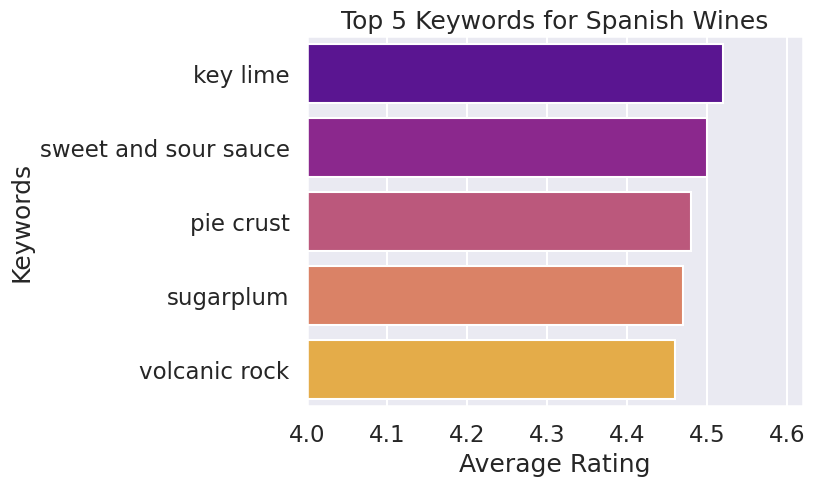

In [23]:
df_taste_countries = pd.read_csv('/home/siegfried2021/Bureau/BeCode_AI/Projets/Wiwino_project/CSV files/question8.csv')

espagne= df_taste_countries[df_taste_countries['Countries'] == 'Espagne']
top_5_espagne = espagne.sort_values(by='Ratings_Average', ascending=False).head(5)
top_5_espagne

sns.barplot(x='Ratings_Average', y='Keywords', data=top_5_espagne, palette='plasma')
plt.xlabel('Average Rating')
plt.title('Top 5 Keywords for Spanish Wines')
plt.xlim(4, top_5_espagne['Ratings_Average'].max() + 0.1)

/tmp/ipykernel_532189/2130924962.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




(4.0, 4.619999999999999)

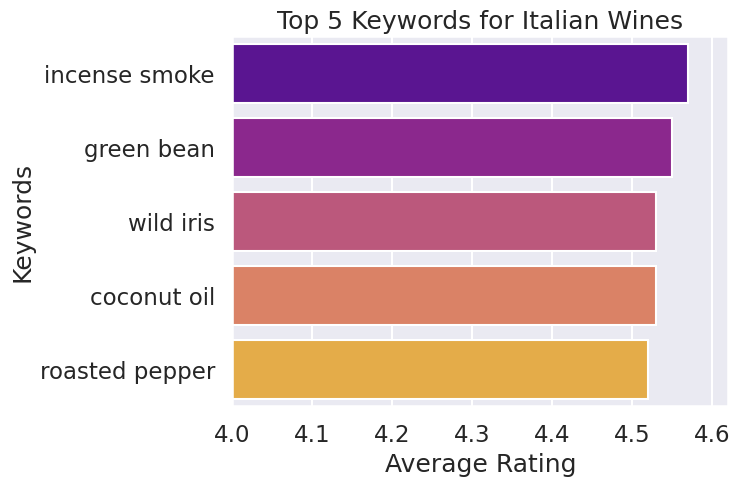

In [19]:
italie= df_taste_countries[df_taste_countries['Countries'] == 'Italie']
top_5_italie = italie.sort_values(by='Ratings_Average', ascending=False).head(5)
top_5_italie

sns.barplot(x='Ratings_Average', y='Keywords', data=top_5_italie, palette='plasma')
plt.xlabel('Average Rating')
plt.title('Top 5 Keywords for Italian Wines')
plt.xlim(4, top_5_espagne['Ratings_Average'].max() + 0.1)

## Question 9: Understanding the relationship between wine sensory properties and vintage prices

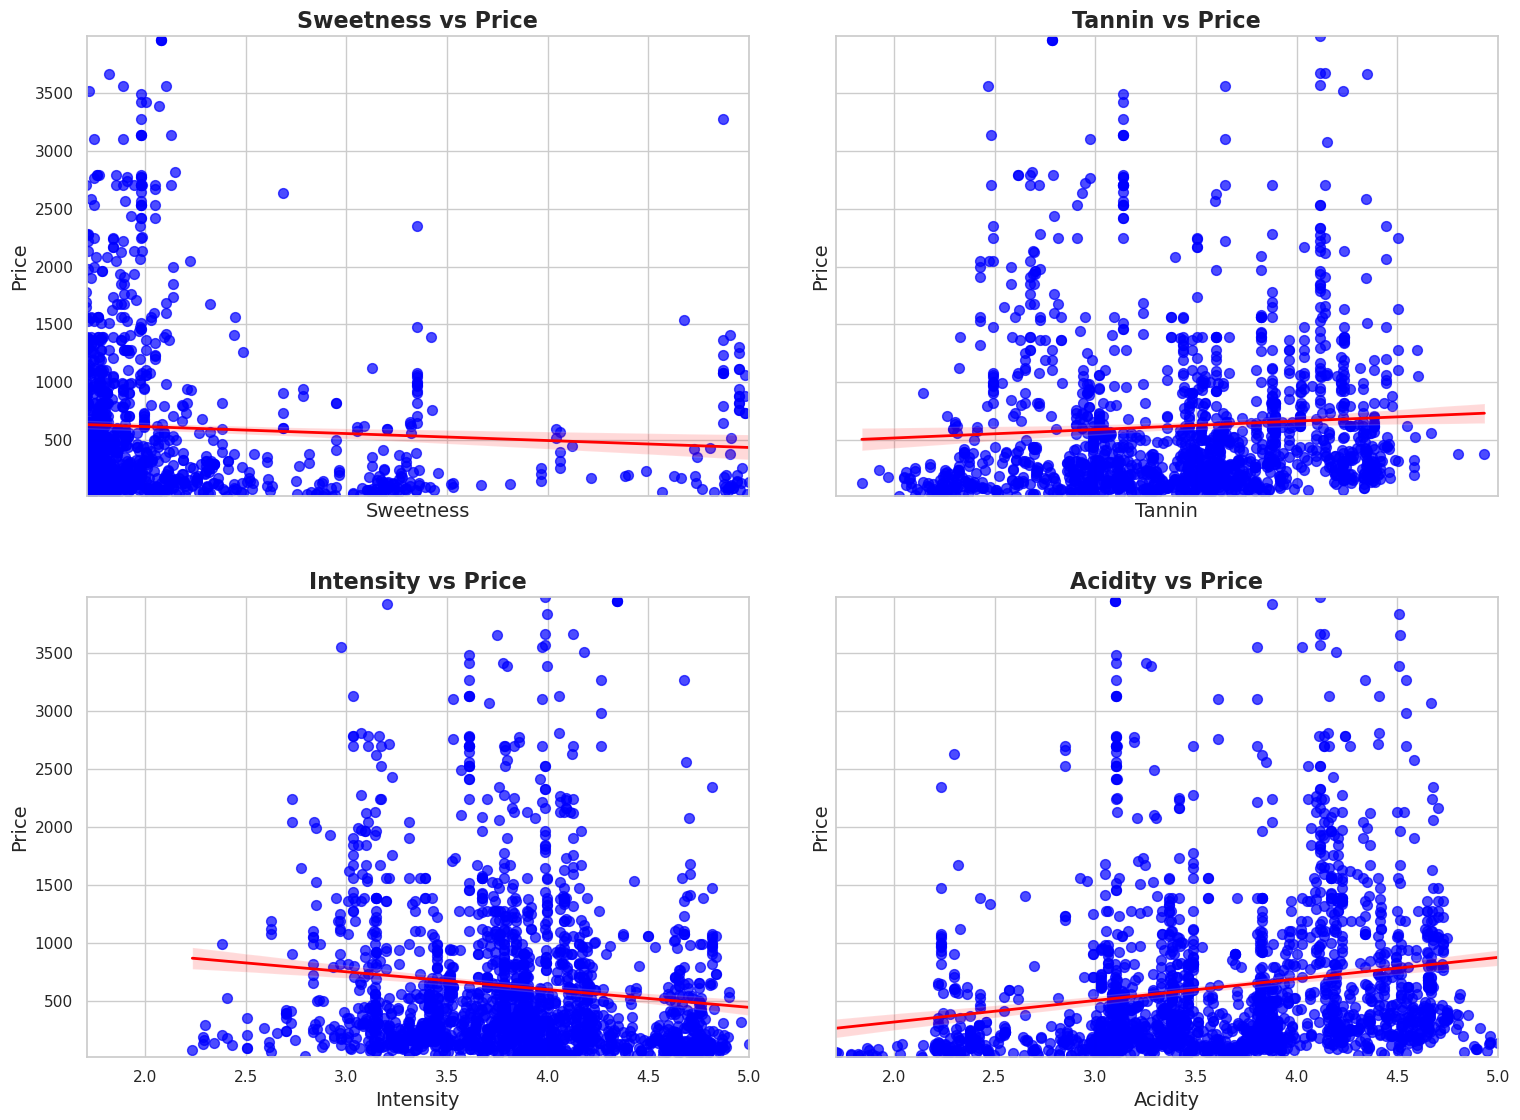

In [ ]:
df_wine_features_price = pd.read_csv('/home/siegfried2021/Bureau/BeCode_AI/Projets/Wiwino_project/CSV files/question9.csv')
df_wine_features_low_prices = df_wine_features_price[df_wine_features_price['price_euros_liter'] <= 4000]

# Creating the dataframe for seaborn
df_plot = df_wine_features_low_prices[['sweetness', 'tannin', 'intensity', 'acidity', 'price_euros_liter']]

sns.set(style='whitegrid', palette='pastel')

# Creating the four subplots
fig, axs = plt.subplots(2, 2, figsize=(16, 12), sharex='all', sharey='all')

# Defining a common function to add plots
def add_regplot(ax, x, y, title, xlabel, ylabel):
    sns.regplot(x=x, y=y, data=df_plot, ax=ax, ci=95, scatter_kws={'s': 50, 'alpha': 0.7, 'color': 'blue'}, line_kws={'color': 'red', 'lw': 2})
    ax.set_title(title, fontsize=16, fontweight='bold')
    ax.set_xlabel(xlabel, fontsize=14)
    ax.set_ylabel(ylabel, fontsize=14)
    ax.set_xlim(df_plot[x].min(), df_plot[x].max()) 
    ax.set_ylim(df_plot[y].min(), df_plot[y].max())
# Adding each plot
add_regplot(axs[0, 0], 'sweetness', 'price_euros_liter', 'Sweetness vs Price', 'Sweetness', 'Price')
add_regplot(axs[0, 1], 'tannin', 'price_euros_liter', 'Tannin vs Price', 'Tannin', 'Price')
add_regplot(axs[1, 0], 'intensity', 'price_euros_liter', 'Intensity vs Price', 'Intensity', 'Price')
add_regplot(axs[1, 1], 'acidity', 'price_euros_liter', 'Acidity vs Price', 'Acidity', 'Price')

plt.tight_layout(pad=3.0)
plt.show()